<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# OpenEO Platform - User Story 1

## Access of pre-computed data over a large area.

In [1]:
from eo_utils import *

## Background - Explore the openEO back-ends

Before loading and processing the data, we can have a look at the available collections of the EODC back-end:

In [93]:
eodc_backend = "https://openeo.eodc.eu/v1.0"
vito_backend = "https://openeo-dev.vito.be"
con = openeo.connect(eodc_backend)
con.list_collections()

[{'description': 'Sentinel-2 is a multispectral, high-resolution, optical imaging mission, developed by the European Space Agency (ESA) in the frame of the Copernicus program of the European Commission.',
  'extent': {'spatial': {'bbox': [[-180.0, -90.0, 180.0, 90.0]]},
   'temporal': {'interval': [[None, None]]}},
  'id': 's2b_prd_msil1c',
  'license': 'no conditions apply',
  'links': [{'href': 'https://openeo.eodc.eu/v1.0/collections/s2b_prd_msil1c',
    'rel': 'self'},
   {'href': 'parent', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
   {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'}],
  'stac_extensions': ['datacube', 'eo'],
  'stac_version': '0.9.0'},
 {'description': 'Sentinel-2 is a multispectral, high-resolution, optical imaging mission, developed by the European Space Agency (ESA) in the frame of the Copernicus program of the European Commission.',
  'extent': {'spatial': {'bbox': [[-180.0, -90.0, 180.0, 90.0]]},
   'temporal': {'interval': [[None, None]]}},
  'id': 's2a_prd_msil1c',
  'license': 'no conditions apply',
  'links': [{'href': 'https://openeo.eodc.eu/v1.0/collections/s2a_prd_msil1c',
    'rel': 'self'},
   {'href': 'parent', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
   {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'}],
  'stac_extensions': ['datacube', 'eo'],
  'stac_version': '0.9.0'},
 {'description': 'Sentinel-1 is an imaging radar mission providing continuous all-weather, day-and-night imagery at C-band. The Sentinel-1 constellation provides high reliability, improved revisit time, geographical coverage and rapid data dissemination to support operational applications in the priority areas of marine monitoring, land monitoring and emergency services.',
  'extent': {'spatial': {'bbox': [[-180.0, -90.0, 180.0, 90.0]]},
   'temporal': {'interval': [[None, None]]}},
  'id': 's1a_csar_grdh_iw',
  'license': 'no conditions apply',
  'links': [{'href': 'https://openeo.eodc.eu/v1.0/collections/s1a_csar_grdh_iw',
    'rel': 'self'},
   {'href': 'parent', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
   {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'}],
  'stac_extensions': ['datacube', 'sar'],
  'stac_version': '0.9.0'},
 {'description': 'Sentinel-3 is an European Earth Observation satellite mission developed to support GMES ocean, land, atmospheric, emergency, security and cryospheric applications.',
  'extent': {'spatial': {'bbox': [[-180.0, -90.0, 180.0, 90.0]]},
   'temporal': {'interval': [[None, None]]}},
  'id': 's3a_ol_1_efr',
  'license': 'no conditions apply',
  'links': [{'href': 'https://openeo.eodc.eu/v1.0/collections/s3a_ol_1_efr',
    'rel': 'self'},
   {'href': 'parent', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
   {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0'},
 {'description': 'Sentinel-1 is an imaging radar mission providing continuous all-weather, day-and-night imagery at C-band. The Sentinel-1 constellation provides high reliability, improved revisit time, geographical coverage and rapid data dissemination to support operational applications in the priority areas of marine monitoring, land monitoring and emergency services.',
  'extent': {'spatial': {'bbox': [[-180.0, -90.0, 180.0, 90.0]]},
   'temporal': {'interval': [[None, None]]}},
  'id': 's1b_csar_grdh_iw',
  'license': 'no conditions apply',
  'links': [{'href': 'https://openeo.eodc.eu/v1.0/collections/s1b_csar_grdh_iw',
    'rel': 'self'},
   {'href': 'parent', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
   {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'}],
  'stac_extensions': ['datacube', 'sar'],
  'stac_version': '0.9.0'},
 {'description': 'Preprocessed analysis-read-data (ARD) from Landsat-8',
  'extent': {'spatial': {'bbox': [[6.022720992309466,
      42.50120437013096,
      18.324913302352606,
      48.31266918320008]]},
   'temporal'

Get the metadata for Sentinel-2 ARD collection:

In [41]:
con.describe_collection("boa_sentinel_2")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['band_1',
    'band_2',
    'band_3',
    'band_4',
    'band_5',
    'band_6',
    'band_7',
    'band_8',
    'band_9',
    'band_10']},
  't': {'extent': ['2016-01-13T12:00:00+00:00', '2020-12-29T12:00:00+00:00'],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [4700000.0, 5100000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [1300000.0, 1700000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'deprecated': False,
 'description': 'Preprocessed analysis-read-data (ARD) from Sentinel-2',
 'extent': {'spatial': {'bbox': [[8.896022536230403,
     44.62215188268141,
     14.464866948944257,
     47.73722929134869]]},
  'temporal': {'interval': [['2016-01-13T12:00:00+00:00',
     '2020-12-29T12:00:00+00:00']]}},
 'id': 'boa_sentinel_2',
 'links': [{'href': 'http://doi.org/10.3390/rs11091124', 'rel': 'about'},
  {'href': 'http://doi.org/10.1016/j.rse.2018.04.046', 'rel': 'cloud'},
  {'href': 'https://doi.org/10.3390/rs13010137', 'rel': 'snow-ice'},
  {'href': 'https://doi.org/10.3390/rs13010137', 'rel': 'land-water'},
  {'href': 'http://doi.org/10.3390/rs10020352', 'rel': 'water-vapor'},
  {'href': 'https://doi.org/10.3390/rs13010137', 'rel': 'cloud-shadow'},
  {'href': 'https://ceos.org/ard/files/PFS/SR/v5.0/CARD4L_Product_Family_Specification_Surface_Reflectance-v5.0.pdf',
   'rel': 'card4l-document'},
  {'href': 'https://spacedata.copernicus.eu/web/cscda/dataset-details?articleId=394198',
   'rel': 'elevation-model',
   'title': 'Copernicus DEM 30m'},
  {'href': 'http://doi.org/10.3390/rs10020352',
   'rel': 'atmospheric-scattering'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections/boa_sentinel_2',
   'rel': 'self'},
  {'href': 'parent', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
  {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections/boa_sentinel_2/items',
   'rel': 'items'}],
 'stac_extensions': ['datacube', 'eo'],
 'stac_version': '1.0.0-beta',
 'summaries': {'constellation': ['sentinel-2'],
  'eo:bands': [{'center_wavelength': 0.489,
    'common_name': 'blue',
    'name': 'band_1'},
   {'center_wavelength': 0.559, 'common_name': 'green', 'name': 'band_2'},
   {'center_wavelength': 0.665, 'common_name': 'red', 'name': 'band_3'},
   {'center_wavelength': 0.704, 'common_name': 'rededge', 'name': 'band_4'},
   {'center_wavelength': 0.74, 'common_name': 'rededge', 'name': 'band_5'},
   {'center_wavelength': 0.783, 'common_name': 'rededge', 'name': 'band_6'},
   {'center_wavelength': 0.834, 'common_name': 'nir', 'name': 'band_7'},
   {'center_wavelength': 0.865, 'common_name': 'nir08', 'name': 'band_8'},
   {'center_wavelength': 1.611, 'common_name': 'swir16', 'name': 'band_9'},
   {'center_wavelength': 2.199, 'common_name': 'swir22', 'name': 'band_10'}],
  'eo:gsd': [10],
  'instruments': ['msi']},
 'title': 'boa_sentinel_2'}

## Step 1 -  Area of Interest selection
### Run the next cell, click on the rectangle button and then draw the area over the map like in the following example image
<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/selection_bbox_US1.jpg"
     alt="rectangle_selection"
     style="float: left; margin-right: 10px;" />

In [58]:
center = [47.29, 10.75]
zoom = 7

eoMap = openeoMap(center,zoom)
addS2Tiles(eoMap)
eoMap.map

Map(center=[47.29, 10.75], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

Get the bounding box from the previous map.

In [59]:
bbox = eoMap.getBbox()
print('west',bbox[0],'\neast',bbox[2],'\nsouth',bbox[1],'\nnorth',bbox[3])

west 9.394294 
east 12.811101 
south 46.150156 
north 48.553705


<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/Sentinel_2.jpg"
     alt="Sentinel-2"
     style="float: left; margin-right: 10px; width:100px" />
## Step 2 - openEO graph creation for Sentinel-2 L2A


1. Open the connection with VITO back-end. Please use the openeo-auth tool to configure credentials.
https://open-eo.github.io/openeo-python-client/auth.html#config-files-and-openeo-auth-helper-tool

In [99]:
vito_conn = openeo.connect(vito_backend).authenticate_basic()

We can again explore the collections available at this specific back-end.

In [95]:
vito_conn.list_collections()

[{'description': 'Sentinel 1 GRD Sigma0, mosaic of all ascending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_ASCENDING',
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'Sentinel 1 GRD Sigma0, mosaic of all descending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_DESCENDING',
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'FAPAR Level-3 product at 10m resolution. Covers selected areas globally. This FAPAR is derived directly from ESA L2A products. The FAPAR quantifies the fraction of the solar radiation absorbed by live leaves for the photosynthesis activity. Then, it refers only to the green and alive elements of the canopy. The FAPAR depends on the canopy structure, vegetation element optical properties, atmospheric conditions, and angular configuration. \n\nFAPAR is recognized as an Essential Climate Variable (ECV) by the Global Climate Observing System (GCOS).',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_FAPAR_V2',
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_FAPAR',
    'rel': 'alternate'}],
  'providers': [{'name': 'VITO, on behalf of the Belgian Science Policy Office (BELSPO).',
    'roles': ['producer', 'licensor'],
    'url': 'https://terrascope.be'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel-2 FAPAR L3 V2'},
 {'description': 'NDVI Level-3 product at 10m resolution. Covers selected areas globally. This NDVI is derived directly from ESA L2A products.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_NDVI_V2',
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_NDVI_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl

2. Define collection, time range and bands of interest.

In [62]:
collection      = 'TERRASCOPE_S2_TOC_V2'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2020-08-08", "2020-08-12"]
bands           = ["B04"]

s2_l2a = vito_conn.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

3. Save operation as final step to the pipeline.

In [63]:
s2_l2a_geotiff = s2_l2a.reduce_dimension(reducer="mean", dimension="t").save_result(format="GTIFF")

4. Visualize the openEO process graph.

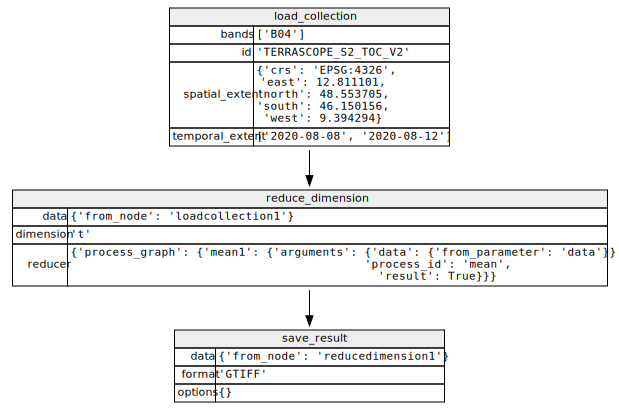

In [64]:
s2_l2a_geotiff.to_graphviz()

6. Create a new batch job on the back-end and ask to process it.

In [65]:
job = vito_conn.create_job(s2_l2a_geotiff.graph)
job_id = job.job_id
if job_id:
    print("Batch job created with id: ",job_id)
    job.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  bbf31968-186e-48d0-8117-ce5ffeecb3c3


We can get a description of the job and check its status.

In [100]:
job = vito_conn.job(job_id)
job_description = job.describe_job()
print("Batch job with id: ",job_id, ' is ',job_description['status'])

Batch job with id:  bbf31968-186e-48d0-8117-ce5ffeecb3c3  is  finished


In [101]:
results = job.get_results()
results

<JobResults for job 'bbf31968-186e-48d0-8117-ce5ffeecb3c3'>

7. Once the job status is 'finished', we can download the result and visualize it.

In [102]:
results.download_file("./data/US1/s2_result_vito.tif")

PosixPath('data/US1/s2_result_vito.tif')

Running the next cell, the Sentinel-2 data will appear on the map as in the following screenshot.

<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/sample_result_B04.jpg"
     alt="sample_B04"
     style="float: left; margin-right: 10px;" />

In [ ]:
addLayer(eoMap,'./data/US1/s2_result.tif','S2 B04',clip=[0,1500])
eoMap.map

In [2]:
B04_S2_vito = xr.open_rasterio('./data/US1/s2_result_vito.tif',chunks={})

In [3]:
B04_S2_vito

<xarray.DataArray (band: 1, y: 27407, x: 25078)>
dask.array<open_rasterio-87e50a181157f5e4ea30145a4a272399<this-array>, shape=(1, 27407, 25078), dtype=int16, chunksize=(1, 27407, 25078), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 5.385e+06 5.385e+06 5.385e+06 ... 5.111e+06 5.111e+06
  * x        (x) float64 5.304e+05 5.305e+05 5.305e+05 ... 7.812e+05 7.812e+05
Attributes:
    transform:      (10.0, 0.0, 530440.0, 0.0, -10.0, 5384870.0)
    crs:            +init=epsg:32632
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (32767.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(20,20))

ax1.imshow(B04_S2_vito[0].values,cmap='Greys_r',vmin=0,vmax=2000)

<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/Sentinel_1.jpg"
     alt="Sentinel-2"
     style="float: left; margin-right: 10px; width:100px" />
## Step 3 - openEO graph creation for Sentinel-1
### We use the same area as before following the same steps with a different collection

In [ ]:
collection      = 'TERRASCOPE_S1_GAMMA0_V1'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2019-09-18", "2019-09-25"]
bands           = ["VH"]

s1 = vito_conn.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)
s1_geotiff = s1.reduce_dimension(reducer="max", dimension="t").save_result(format="GTIFF")

4. Create a new batch job on the back-end and ask to process it.

In [ ]:
s1_job = vito_conn.create_job(s1_geotiff.graph)
s1_job_id = s1_job.job_id
if s1_job_id:
    print("Batch job created with id: ",s1_job_id)
    s1_job.start_job()
else:
    print("Error! Job ID is None")

In [ ]:
s1_job = vito_conn.job(s1_job_id)
job_description = s1_job.describe_job()
print("Batch job with id: ",s1_job_id, ' is ',job_description['status'])

In [ ]:
results = s1_job.get_results()
metadata = results.get_metadata()
results.download_file("./data/US1/s1_result.tif")

Running the next cell, the Sentinel-1 data will appear on the map as in the following screenshot.

<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/sample_result_VH.jpg"
     alt="sample_VH"
     style="float: left; margin-right: 10px;" />

In [27]:
addLayer(eoMap,'./data/US1/s1_result.tif','VH',clip=[0,0.1])
eoMap.map

Map(bottom=371188.0, center=[46.487992534084604, 11.359691619873049], controls=(ZoomControl(options=['position…

<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/Landsat_8.jpg"
     alt="Landsat-8"
     style="float: left; margin-right: 10px; width:100px" />
## Step 4 - openEO graph creation for ARD Landsat-8 @EODC

### Accessing data from overlapping areas in the original Landsat tiling system.

In [3]:
eodc_backend = "https://openeo.eodc.eu/v1.0"
eodc_conn = openeo.connect(eodc_backend).authenticate_basic()

We can have a look at the original spatial coverage of the ARD Landsat-8 collection, with its four overlapping areas.

We are going to demonstrate that, with the Equi7 grid used at EODC, the data is being reprojected and therefore there are no problems of duplicated data in overlapping areas.

In [4]:
itemIter = eodc_conn.collection_items(
    "boa_landsat_8",
    temporal_extent = ["2019-09-20", "2019-09-21"],
    spatial_extent = [5.0,45.0,20.0,50.0]
)

In [5]:
next(itemIter)

{'features': [{'assets': {'cloud': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The cloud state is available in bit 1-2.',
     'file:values': [{'summary': 'clear', 'values': [0]},
      {'summary': 'less confident cloud (i.e., buffered cloud)',
       'values': [1]},
      {'summary': 'confident, opaque cloud', 'values': [2]},
      {'summary': 'cirrus', 'values': [3]}],
     'href': '/eodc/private/openeo_platform/data/level2/T3/L8/X0015_Y0014/20190921_LEVEL2_LND08_QAI.tif',
     'roles': ['cloud', 'metadata'],
     'type': 'image/tiff; application=geotiff'},
    'cloud_shadow': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The cloud-shadow flag is available in bit 3.',
     'file:values': [{'summary': 'no - no cloud-shadow on pixel',
       'values': [0]},
      {'summary': 'yes - cloud-shadow on pixel', 'values': [1]}],
     'href': '/eodc/private/openeo_platform/data/level2/T3/L8/X0015_Y0014/20190921_LEVEL2_LND08_QAI.tif',
     'roles': ['cloud-shadow', 'metadata'],
     'type': 'image/tiff; application=geotiff'},
    'data': {'created': '2021-02-03T14:20:22.086329+00:00',
     'eo:bands': [{'center_wavelength': 0.482,
       'common_name': 'blue',
       'name': 'band_1'},
      {'center_wavelength': 0.561, 'common_name': 'green', 'name': 'band_2'},
      {'center_wavelength': 0.655, 'common_name': 'red', 'name': 'band_3'},
      {'center_wavelength': 0.865, 'common_name': 'nir08', 'name': 'band_4'},
      {'center_wavelength': 1.609, 'common_name': 'swir16', 'name': 'band_5'},
      {'center_wavelength': 2.2, 'common_name': 'swir22', 'name': 'band_6'}],
     'file:data_type': 'int16',
     'file:nodata': [-9999],
     'file:unit': 'fraction',
     'href': '/eodc/private/openeo_platform/data/level2/T3/L8/X0015_Y0014/20190921_LEVEL2_LND08_BOA.tif',
     'roles': ['data', 'reflectance'],
     'type': 'image/tiff; application=geotiff'},
    'saturation': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The saturation flag is available in bit 9.',
     'file:values': [{'summary': 'no - pixel is NOT saturated', 'values': [0]},
      {'summary': 'yes - pixel is saturated', 'values': [1]}],
     'href': '/eodc/private/openeo_platform/data/level2/T3/L8/X0015_Y0014/20190921_LEVEL2_LND08_QAI.tif',
     'roles': ['saturation', 'metadata'],
     'type': 'image/tiff; application=geotiff'}},
   'bbox': [6.911480576569829,
    42.50120437013096,
    11.280612960587497,
    45.66999962902593],
   'geometry': {'coordinates': [[[6.911480576569829, 42.50120437013096],
      [6.911480576569829, 45.66999962902593],
      [11.280612960587497, 45.66999962902593],
      [11.280612960587497, 42.50120437013096],
      [6.911480576569829, 42.50120437013096]]],
    'type': 'Polygon'},
   'id': '0dba45a9-958a-4988-ac20-0ab3fecc89fd',
   'links': [{'href': 'http://doi.org/10.3390/rs11091124', 'rel': 'about'},
    {'href': 'http://doi.org/10.1109/lgrs.2015.2390673', 'rel': 'cloud'},
    {'href': 'https://doi.pangaea.de/10.1594/PANGAEA.893109',
     'rel': 'related'},
    {'href': 'http://doi.org/10.1594/PANGAEA.893109', 'rel': 'water-vapor'},
    {'href': 'http://doi.org/10.1109/lgrs.2015.2390673',
     'rel': 'cloud-shadow'},
    {'href': 'https://ceos.org/ard/files/PFS/SR/v5.0/CARD4L_Product_Family_Specification_Surface_Reflectance-v5.0.pdf',
     'rel': 'card4l-document',
     'type': 'application/pdf'},
    {'href': 'https://spacedata.copernicus.eu/web/cscda/dataset-details?articleId=394198',
     'rel': 'elevation-model',
     'title': 'Copernicus DEM 30m'},
    {'href': 'http://doi.org/10.3390/rs11030257',
     'rel': 'atmospheric-scattering'},
    {'href': 'root', 'rel': 'https://openeo.eodc.eu/v1.0/collections'},
    {'href': 'https://openeo.eodc.eu/v1.0/collections/boa_landsat_8/items',
     'rel': 'parent'},
    {'href': 'https://openeo.eodc.eu/v1.0/collections/boa_landsat_8/items/0dba45a9-958a-4988-ac2

In [36]:
center = [45.85, 11.0]
zoom = 11

eoMap2 = openeoMap(center,zoom)
eoMap2.map

Map(center=[45.85, 11.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [7]:
bbox = eoMap2.getBbox()
print('west',bbox[0],'\neast',bbox[2],'\nsouth',bbox[1],'\nnorth',bbox[3])

west 10.668411254882814 
east 11.331024169921877 
south 45.754109791149894 
north 45.94542053059529


In [8]:
collection      = 'boa_landsat_8'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2019-09-20", "2019-09-21"]
bands           = ["band_1","band_2","band_3"]

l8 = eodc_conn.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)
l8_geotiff = l8.save_result(format="netCDF")

4. Create a new batch job on the back-end and ask to process it.

In [43]:
l8_job = eodc_conn.create_job(l8_geotiff.graph)
l8_job_id = l8_job.job_id
if l8_job_id:
    print("Batch job created with id: ",l8_job_id)
    l8_job.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  jb-60e9fbc8-48c7-4eb2-ac60-e838a04b6cac


In [48]:
l8_job = eodc_conn.job(l8_job_id)
job_description = l8_job.describe_job()
print("Batch job with id: ",l8_job_id, ' is ',job_description['status'])

Batch job with id:  jb-60e9fbc8-48c7-4eb2-ac60-e838a04b6cac  is  finished


5. Once the job status is 'finished', we can download it.

In [49]:
results = l8_job.get_results()
metadata = results.get_metadata()
results.download_file("./data/US1/l8_result.nc")

PosixPath('data/US1/l8_result.nc')

In [9]:
dc = xr.open_dataset('./data/US1/l8_result.nc')
dc = dc.rename({next(iter(dc.data_vars)): 'L8'})
dc.L8

<xarray.DataArray 'L8' (bands: 3, time: 1, y: 206, x: 302)>
[186636 values with dtype=int16]
Coordinates:
  * time         (time) datetime64[ns] 2019-09-21T12:00:00
  * y            (y) float64 1.422e+06 1.422e+06 ... 1.416e+06 1.416e+06
  * x            (x) float64 4.829e+06 4.829e+06 ... 4.838e+06 4.838e+06
    spatial_ref  int32 ...
  * bands        (bands) object 'band_1' 'band_2' 'band_3'
Attributes:
    crs:           PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM...
    grid_mapping:  spatial_ref

We can visualize the RGB composite as a simple image using Matplotlib. Notice the seamless integration of the overlapping Landsat tiles.

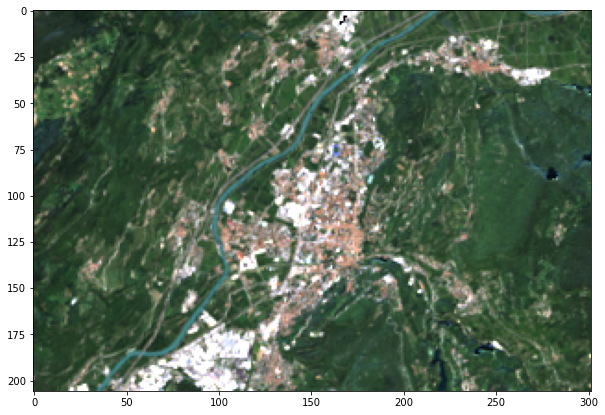

In [10]:
fig, ax1 = plt.subplots(1,1,figsize=(10,10))

ax1.imshow(tone_mapping(dc.L8[2,0],dc.L8[1,0],dc.L8[0,0]),cmap='brg')

In [37]:
addLayer(eoMap2,'./data/US1/l8_result.nc',name='L8',clip=[0,1800])
eoMap2.map

Map(bottom=187036.0, center=[45.85, 11.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in…